In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [3]:
# Create dataframe with all control records
control_df = df[df['group'] == 'control']

# Compute completion rate
control_cr = control_df['completed'].mean()

# Display completion rate
control_cr

0.3719951923076923

In [4]:
# Create dataframe with all experiment records
experiment_df = df[df['group'] == 'experiment']

# Compute completion rate
experiment_cr = experiment_df['completed'].mean()

# Display completion rate
experiment_cr

0.3935334872979215

In [5]:
# Compute observed difference in completion rates
obs_diff = experiment_cr - control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [6]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    boot_samp = df.sample(df.shape[0], replace=True)
    experiment_cr = boot_samp[boot_samp['group'] == 'experiment']['completed'].mean()
    control_cr = boot_samp[boot_samp['group'] == 'control']['completed'].mean()
    diffs.append(experiment_cr - control_cr)



In [7]:
# convert to numpy array
diffs = np.array(diffs)

(array([  10.,   85.,  449., 1353., 2457., 2778., 1837.,  776.,  223.,
          32.]),
 array([-0.0381512 , -0.02679438, -0.01543755, -0.00408072,  0.0072761 ,
         0.01863293,  0.02998976,  0.04134658,  0.05270341,  0.06406024,
         0.07541706]),
 <BarContainer object of 10 artists>)

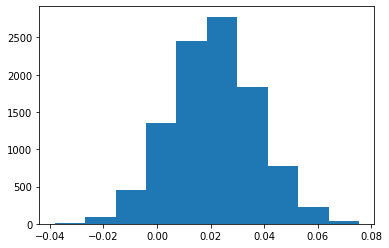

In [8]:
# plot distribution
plt.hist(diffs)

In [9]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

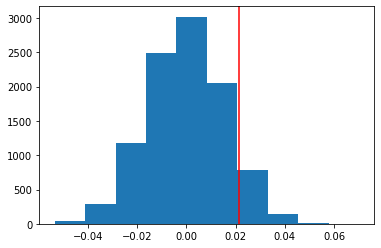

In [10]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='r')

In [11]:
# compute p value
(null_vals > obs_diff).mean()

0.0846